In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#It's a great dataset for evaluating simple regression models. The dataset is from kaggle. https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
house_data = pd.read_csv("kc_house_data.csv")

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data_df = house_data[["price", "bedrooms"]]
house_data_df

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4
4,510000.0,3
5,1230000.0,4
6,257500.0,3
7,291850.0,3
8,229500.0,3
9,323000.0,3


In [6]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = house_data_df.price.values.reshape(-1, 1)
y = house_data_df.bedrooms.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (21613, 1) (21613, 1)


array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

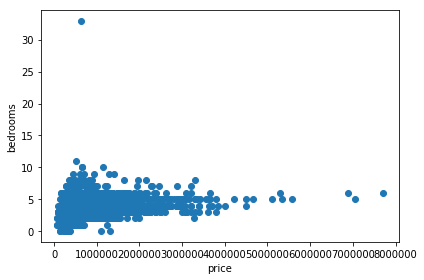

In [7]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.tight_layout()
### END SOLUTION

In [8]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [15]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[7.80629371e-07]]
y-axis intercept:  [2.94915956]


In [11]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[75000.]]
Max X Value: [[7700000.]]


In [12]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

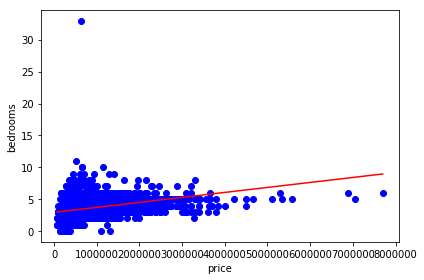

In [13]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.tight_layout()
### END SOLUTION

In [ ]:
#This trend line shows that generally as the number of bedrooms in a house increases, the price of the house increases as well.
#Other variables can affect the price of a house as well though.
#The condition the house is in and its location can also be factors in the price of a house.
#We can see in the graph that we had an outlier with over 30 bedrooms only worth a million dollars. 